In [14]:
import pandas as pd
import numpy as np
import gc

In [15]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage of dataframe is {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is: {end_mem:.2f} MB')
    print(f'Decreased by {100 * (start_mem - end_mem) / start_mem:.1f}%')

    return df

In [ ]:
print("Loading files..")
train_transaction = pd.read_csv(r'D:\Lohith\BTECH CODES\Machine_Learning\dataset\train_transaction.csv')
train_identity = pd.read_csv(r'D:\Lohith\BTECH CODES\Machine_Learning\dataset\train_identity.csv')

train_transaction = reduce_mem_usage(train_transaction)

Loading files..


In [ ]:
print("Merging..")
train = pd.merge(train_transaction , train_identity, on="TransactionID", how="left")
del train_transaction,train_identity
gc.collect()
print(f"Datasets Merged, Shape: {train.shape}")

Merging..
Datasets Merged, Shape: (590540, 434)


In [ ]:
train.head()

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


Fraud Distribution:  isFraud
0    569877
1     20663
Name: count, dtype: int64
Fraud percentage: 3.50%


C:\Users\USER\AppData\Local\Temp\ipykernel_27564\2696589792.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'isFraud', data=train,palette='icefire')


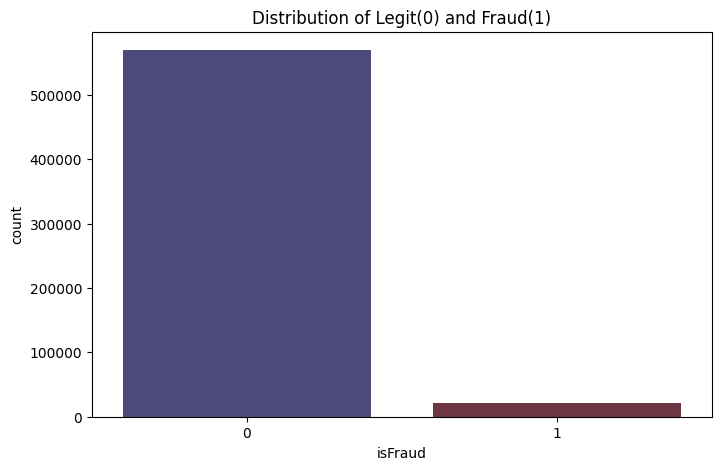

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Fraud entries in the dataset
fraud_count = train['isFraud'].value_counts()
print("Fraud Distribution: ", fraud_count)
print(f"Fraud percentage: {train['isFraud'].mean()*100:.2f}%")

plt.figure(figsize=(8,5))
sns.countplot(x= 'isFraud', data=train,palette='icefire')
plt.title('Distribution of Legit(0) and Fraud(1)')
plt.show()

In [ ]:
# Let's check how many columns we drop at different thresholds
missing_stats = train.isnull().mean() * 100

print(f"Current Shape: {train.shape}")
print(f"Columns > 90% missing: {len(missing_stats[missing_stats > 90])}")
print(f"Columns > 80% missing: {len(missing_stats[missing_stats > 80])}")
print(f"Columns > 70% missing: {len(missing_stats[missing_stats > 70])}")
print(f"Columns > 50% missing: {len(missing_stats[missing_stats > 50])}")

Current Shape: (590540, 434)
Columns > 90% missing: 12
Columns > 80% missing: 74
Columns > 70% missing: 208
Columns > 50% missing: 214


As for the >90% we only have 12 columns which doesn't help much for our ram as well as our model performance, and 
For >70% we have 208 columns which is nearly half of our dataset which we can't afford to drop as it may also drop some important features.
So, We go with 80% as it has 74 columns which is a decent number to drop the columns.

In [ ]:
# Now We focus on the missing values
missing_stats = train.isnull().mean()*100
useless_cols = missing_stats[missing_stats > 80].index.tolist()
print(f"Total columns: {len(train.columns)}")
print(f"Columns with > 80% missing_stats: {len(useless_cols)}")

train = train.drop(columns=useless_cols)
print(f"Dropped {len(useless_cols)} columns")
print(f"Final Cleaned datset: {train.shape}")

Total columns: 434
Columns with > 80% missing_stats: 74
Dropped 74 columns
Final Cleaned datset: (590540, 360)


In [ ]:
# Now time to take care of categorical columns
from sklearn.preprocessing import LabelEncoder

cat_cols = train.select_dtypes(include=['object','category']).columns
print(f"Found {len(cat_cols)} categorical columns to encode")

for col in cat_cols:
    train[col] = train[col].astype(str)
# Instead of dropping or filling the NaN values in the cat_cols we are replacing them with "unknown" becoz If a user hides their DeviceType, that is suspicious! By filling it with "unknown" and encoding it as a number the model can learn
    train.loc[train[col] == 'nan', col] = 'unknown'
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))

Found 26 categorical columns to encode


In [ ]:
train.head()

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,4,13926,NaN,150.0,1,142.0,...,NaN,2,2,129,2,2,2,2,2,1774
1,2987001,0,86401,29.0,4,2755,404.0,150.0,2,102.0,...,NaN,2,2,129,2,2,2,2,2,1774
2,2987002,0,86469,59.0,4,4663,490.0,150.0,4,166.0,...,NaN,2,2,129,2,2,2,2,2,1774
3,2987003,0,86499,50.0,4,18132,567.0,150.0,2,117.0,...,NaN,2,2,129,2,2,2,2,2,1774
4,2987004,0,86506,50.0,1,4497,514.0,150.0,2,102.0,...,144.0,1,1,123,1,0,1,1,1,954


In [ ]:
# Splitting the Data

train = train.sort_values('TransactionDT')
X = train.drop(['isFraud','TransactionDT','TransactionID'],axis=1)
Y = train['isFraud']

# Splitting the dataset 
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=False)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

Training Shape: (472432, 357)
Testing Shape: (118108, 357)


We dropped "isFraud" column becoz it is the target column

We dropped "TransactionDT" columnn becoz it is number of seconds since the dataset started.This number keeps increasing forever and is not ideal for our model.

We dropped "TransactionID" becoz it just counts the rows it contains no information about the transaction. If we leave it model might try to memorize it leading to Overfitting.

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X.columns)),columns=['Value','Feature'])

top20 = feature_imp.sort_values(by="Value",ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(x="Value",y="Feature",data=top20,palette='magma')
plt.title('Top 20 Most Important Features')
plt.tight_layout()
plt.show()

NameError: name 'clf' is not defined

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix

clf = LGBMClassifier(n_estimators=500,learning_rate=0.05,num_leaves=31,random_state=42,n_jobs=1)

print("Training the model...")
clf.fit(X_train,Y_train)

Y_pred_prob = clf.predict_proba(X_test)[:,1]
score= roc_auc_score(Y_test,Y_pred_prob)
print(f"Final ROC-AUC Score: {score:.4f}")


Training the model...
Final ROC-AUC Score: 0.9099


In [ ]:

print()
y_pred = clf.predict(X_test)
print("Classification Report:\n",classification_report(Y_test,y_pred))

cm = confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='d',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

NameError: name 'clf' is not defined